# 第二次上机任务 5.24
`机卓2001 毛瑞琪`
- 编写代码补充完成Fashion_MNIST_incomplete.ipynb，并进行训练、调参
  - 补充完成class NeuralNet(nn.Module)
  - 设置并调整超参数，完成训练，争取在测试集上取得尽量好的效果。根据需要，修改超参数、网络结构等，迭代改进
- 提交.ipynb文件和一份描述超参数调参过程及模型测试结果的报告


In [113]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
# try running the following code, if you see errors on Windows OS

import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [115]:
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

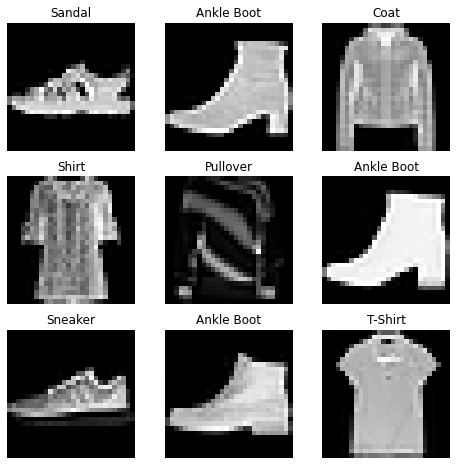

In [116]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


综上所述，下面是一个合理的参数选择：

num_epochs = 20
batch_size = 128
weight_decay = 0.0001
learning_rate = 0.001

In [117]:
# Find your own hyper-parameters 

num_epochs = 15
batch_size = 128
weight_decay = 0.0001
learning_rate = 0.001

In [118]:
# Create data loaders.
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([128, 1, 28, 28])
Shape of y: torch.Size([128]) torch.int64


In [119]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNet(nn.Module):
    def __init__(self,num_classes=10):
        super(NeuralNet, self).__init__()
        
        #定义神经网络的层
        self.conv1 = nn.Conv2d(1,32,3,padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # 定义前向传播过程
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        return out
    
model = NeuralNet().to(device)

Using cuda device


In [120]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = weight_decay)  

In [121]:
# Train the model
total_step = len(train_dataloader)
loss_list = []
epoch_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)    #将数据移动到GPU上
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    
    # 记录每个epoch的loss和epoch数
    loss_list.append(loss.item())
    epoch_list.append(epoch + 1)

Epoch [1/15], Step [100/469], Loss: 0.7189
Epoch [1/15], Step [200/469], Loss: 0.6239
Epoch [1/15], Step [300/469], Loss: 0.3565
Epoch [1/15], Step [400/469], Loss: 0.3745
Epoch [2/15], Step [100/469], Loss: 0.3724
Epoch [2/15], Step [200/469], Loss: 0.4331
Epoch [2/15], Step [300/469], Loss: 0.2048
Epoch [2/15], Step [400/469], Loss: 0.2887
Epoch [3/15], Step [100/469], Loss: 0.3302
Epoch [3/15], Step [200/469], Loss: 0.3705
Epoch [3/15], Step [300/469], Loss: 0.1623
Epoch [3/15], Step [400/469], Loss: 0.2541
Epoch [4/15], Step [100/469], Loss: 0.3094
Epoch [4/15], Step [200/469], Loss: 0.3153
Epoch [4/15], Step [300/469], Loss: 0.1390
Epoch [4/15], Step [400/469], Loss: 0.2354
Epoch [5/15], Step [100/469], Loss: 0.2575
Epoch [5/15], Step [200/469], Loss: 0.2637
Epoch [5/15], Step [300/469], Loss: 0.1178
Epoch [5/15], Step [400/469], Loss: 0.2082
Epoch [6/15], Step [100/469], Loss: 0.2185
Epoch [6/15], Step [200/469], Loss: 0.2114
Epoch [6/15], Step [300/469], Loss: 0.1083
Epoch [6/15

Epoch 1: Loss=0.3411
Epoch 2: Loss=0.2405
Epoch 3: Loss=0.2220
Epoch 4: Loss=0.2103
Epoch 5: Loss=0.2108
Epoch 6: Loss=0.2210
Epoch 7: Loss=0.2144
Epoch 8: Loss=0.1966
Epoch 9: Loss=0.1679
Epoch 10: Loss=0.1404
Epoch 11: Loss=0.1408
Epoch 12: Loss=0.1051
Epoch 13: Loss=0.1402
Epoch 14: Loss=0.1079
Epoch 15: Loss=0.1069


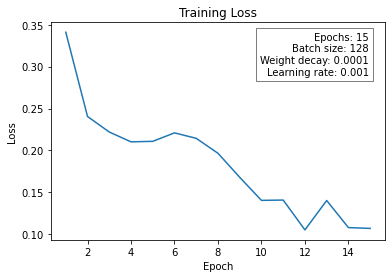

In [122]:
#训练结果可视化

# 输出loss随epoch的变化
for epoch, loss in zip(epoch_list, loss_list):
    print(f"Epoch {epoch}: Loss={loss:.4f}")

# 可视化loss随epoch的变化
plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

# 添加文本注释
text = f'Epochs: {num_epochs}\nBatch size: {batch_size}\nWeight decay: {weight_decay}\nLearning rate: {learning_rate}'
plt.text(0.95, 0.75, text, transform=plt.gca().transAxes, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [123]:
# Test the model

model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        _, preds = torch.max(outputs, 1)
        y_true += labels.cpu().numpy().tolist()
        y_pred += preds.cpu().numpy().tolist()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 90.75 %


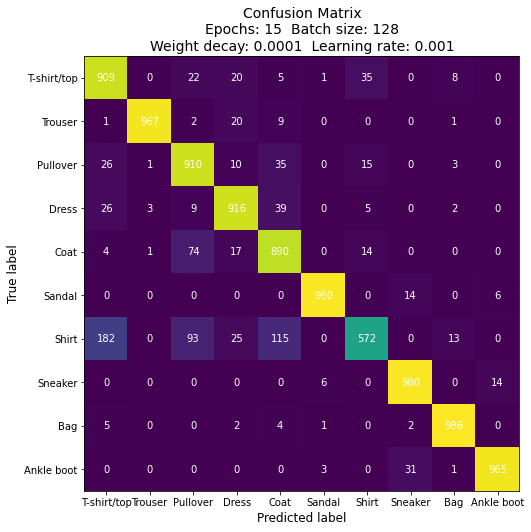

Epochs: 15
Batch size: 128
Weight decay: 0.0001
Learning rate: 0.001
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.91      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.91      0.86      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.89      0.57      0.70      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



In [124]:
# 生成混淆矩阵并可视化
classes = test_data.classes
conf_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, fontsize=10)
ax.set_yticklabels(classes, fontsize=10)
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="w")
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title(f'Confusion Matrix\nEpochs: {num_epochs}  Batch size: {batch_size}\nWeight decay: {weight_decay}  Learning rate: {learning_rate}', fontsize=14)
plt.show()

# 生成分类报告并打印
class_report = classification_report(y_true, y_pred, target_names=classes)
# 添加标题
title = 'Classification Report'
class_report_with_title = f'Epochs: {num_epochs}\nBatch size: {batch_size}\nWeight decay: {weight_decay}\nLearning rate: {learning_rate}\n{class_report}'

# 打印分类报告
print(class_report_with_title)